<a href="https://colab.research.google.com/github/jnramirezg/mecanica_de_solidos/blob/main/codigo/17-(3_4_3)_ejemplo_varias_galgas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17. Ejemplo: más de tres galgas extensométricas (sección 3.4.3)

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Michael Heredia Pérez, <mherediap@unal.edu.co> | 2022-07-16 | Conversión de código de MATLAB a Python|
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2022-09-24 | Adecuando código|

Suponga que tenemos cinco galgas extensométricas, a saber A, B, C, D y E, ubicadas sobre el mismo plano a unas inclinaciones de 0°, 72°, 144°, 216° y 288° tal y como se ilustra en la <font color='blue'>figura</font>; las deformaciones medidas por las galgas fueron 3.0012×10−4, 3.4521×10−4, 1.4935×10−3, −4.0924×10−4 y 1.5207×10−3, respectivamente;
dichas lecturas no son precisas, ya que tienen unos pequeños errores de medición. 

* Dadas las lecturas anteriores, estime la mejor aproximación posible de las deformaciones $\varepsilon_x$ , $\varepsilon_y$ y $\varepsilon_{xy}$ .

![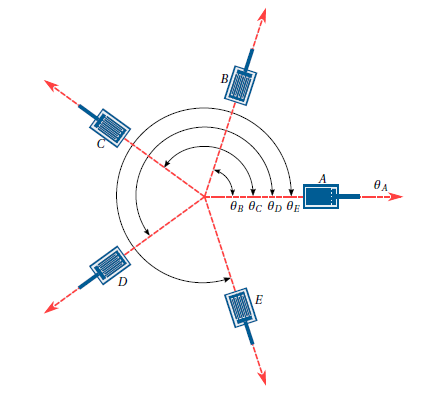](attachment:imagen-2.png)
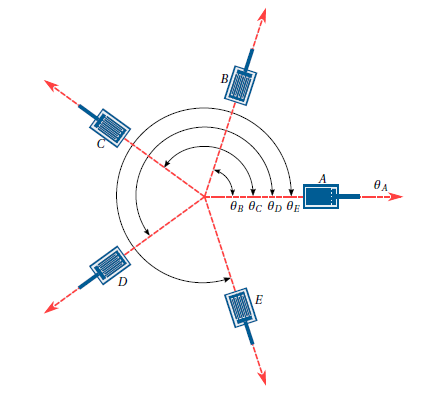

Importamos de la librería ```numpy``` para cálculos numéricos, algunas funciones:

In [1]:
from numpy import sin, cos, deg2rad, array
from numpy.linalg import inv, pinv

A partir de la formulación del problema definimos las siguientes constantes:

In [2]:
eA =  3.0012e-4; tA = 0
eB =  3.4521e-4; tB = 72
eC =  1.4935e-3; tC = 144
eD = -4.0924e-4; tD = 216
eE =  1.5207e-3; tE = 288

Usando la ecuación $\varepsilon_{x'} = \varepsilon_{x} \cos^{2}{\left(\theta \right)} + \varepsilon_{y} \sin^{2}{\left(\theta \right)}+\varepsilon_{xy} \sin{\left(2\theta \right)}$, 

podemos escribir $\varepsilon_A$, $\varepsilon_B$, $\varepsilon_C$, $\varepsilon_D$ y $\varepsilon_E$ en función de $\varepsilon_x$, $\varepsilon_y$, $\varepsilon_{xy}$ y el ángulo de inclinación $\theta$, de manera que:

$$\varepsilon_{A} = \varepsilon_{x'}(\theta_A) = \varepsilon_{x} \cos^{2}{\left(\theta_A \right)} + \varepsilon_{y} \sin^{2}{\left(\theta_A \right)}+\varepsilon_{xy} \sin{\left(2\theta_A \right)}$$
$$\varepsilon_{B} = \varepsilon_{x'}(\theta_B) = \varepsilon_{x} \cos^{2}{\left(\theta_B \right)} + \varepsilon_{y} \sin^{2}{\left(\theta_B \right)}+\varepsilon_{xy} \sin{\left(2\theta_B \right)}$$
$$\varepsilon_{C} = \varepsilon_{x'}(\theta_C) = \varepsilon_{x} \cos^{2}{\left(\theta_C \right)} + \varepsilon_{y} \sin^{2}{\left(\theta_C \right)}+\varepsilon_{xy} \sin{\left(2\theta_C \right)}$$
$$\varepsilon_{D} = \varepsilon_{x'}(\theta_D) = \varepsilon_{x} \cos^{2}{\left(\theta_D \right)} + \varepsilon_{y} \sin^{2}{\left(\theta_D \right)}+\varepsilon_{xy} \sin{\left(2\theta_D \right)}$$
$$\varepsilon_{E} = \varepsilon_{x'}(\theta_E) = \varepsilon_{x} \cos^{2}{\left(\theta_E \right)} + \varepsilon_{y} \sin^{2}{\left(\theta_E \right)}+\varepsilon_{xy} \sin{\left(2\theta_E \right)}$$

El sistema de ecuaciones anterior se puede escribir como:

$$\left[\begin{matrix}\varepsilon_{A}\\ 
                      \varepsilon_{B}\\
                      \varepsilon_{C}\\
                      \varepsilon_{D}\\
                      \varepsilon_{E}\\
                                       \end{matrix}\right] =
\left[\begin{matrix}\cos^{2}{\left(\theta_A \right)} & \sin^{2}{\left(\theta_A \right)} & \sin{\left(2\theta_A \right)}\\
                    \cos^{2}{\left(\theta_B \right)} & \sin^{2}{\left(\theta_B \right)} & \sin{\left(2\theta_B \right)}\\
                    \cos^{2}{\left(\theta_C \right)} & \sin^{2}{\left(\theta_C \right)} & \sin{\left(2\theta_C \right)}\\ 
                    \cos^{2}{\left(\theta_D \right)} & \sin^{2}{\left(\theta_D \right)} & \sin{\left(2\theta_D \right)}\\ 
                    \cos^{2}{\left(\theta_E \right)} & \sin^{2}{\left(\theta_E \right)} & \sin{\left(2\theta_E \right)}\\ \end{matrix}\right]
\left[\begin{matrix}\varepsilon_{x} \\ \varepsilon_{y}\\ \gamma_{xy} \end{matrix}\right]$$

$$\underline{b} = \underline{\underline{A}} \underline{x}$$

Sin embargo, este sistema de ecuaciones no se puede resolver de la forma usual premultiplicando por $\underline{\underline{A}}^{−1}$ a ambos lados de la igualdad, ya que la matriz $\underline{\underline{A}}$ **no** es cuadrada, y en consecuencia su inversa no existe; sin embargo, se puede resolver utilizando la formulación de mínimos cuadrados, de modo que:

$$\underline{x} = (\underline{\underline{A}}^T\underline{\underline{A}})^{-1}\underline{\underline{A}}^T\underline{b}$$

$$\underline{x} = \underline{\underline{A}}^\dagger\underline{b}$$

Donde $\underline{\underline{A}}^\dagger$ es la llamada pseudoinversa de Moore-Penrose (ver, por ejemplo, [https://en.wikipedia.org/wiki/Moore-Penrose_inverse](https://en.wikipedia.org/wiki/Moore-Penrose_inverse)).

En Python no tenemos la función ```cosd()``` ni ```sind()```, las cuales calculan cosenos y senos, respectivamente, con el argumento en grados (*degrees*), podríamos usar la función ```numpy.deg2rad()``` para convertir de grados a radianes y hacer el cálculo, o construir las funciones simplemente:

In [3]:
cosd = lambda t : cos(deg2rad(t)) # Calcula el coseno de ángulos en grados.
sind = lambda t : sin(deg2rad(t)) # Calcula el seno de ángulos en grados.

Construimos la matriz: $$\underline{\underline{A}}=\left[\begin{matrix}\cos^{2}{\left(\theta_A \right)} & \sin^{2}{\left(\theta_A \right)} & \sin{\left(2\theta_A \right)}\\
                    \cos^{2}{\left(\theta_B \right)} & \sin^{2}{\left(\theta_B \right)} & \sin{\left(2\theta_B \right)}\\
                    \cos^{2}{\left(\theta_C \right)} & \sin^{2}{\left(\theta_C \right)} & \sin{\left(2\theta_C \right)}\\ 
                    \cos^{2}{\left(\theta_D \right)} & \sin^{2}{\left(\theta_D \right)} & \sin{\left(2\theta_D \right)}\\ 
                    \cos^{2}{\left(\theta_E \right)} & \sin^{2}{\left(\theta_E \right)} & \sin{\left(2\theta_E \right)}\\ \end{matrix}\right]$$

In [4]:
A = array([[ cosd(tA)**2, sind(tA)**2, sind(2*tA) ],
           [ cosd(tB)**2, sind(tB)**2, sind(2*tB) ],
           [ cosd(tC)**2, sind(tC)**2, sind(2*tC) ],
           [ cosd(tD)**2, sind(tD)**2, sind(2*tD) ],
           [ cosd(tE)**2, sind(tE)**2, sind(2*tE) ]])
A  # Imprimir.

array([[ 1.        ,  0.        ,  0.        ],
       [ 0.0954915 ,  0.9045085 ,  0.58778525],
       [ 0.6545085 ,  0.3454915 , -0.95105652],
       [ 0.6545085 ,  0.3454915 ,  0.95105652],
       [ 0.0954915 ,  0.9045085 , -0.58778525]])

Construimos el vector: $$\underline{b}=\left[\begin{matrix}\varepsilon_{A}& 
                      \varepsilon_{B}&
                      \varepsilon_{C}&
                      \varepsilon_{D}&
                      \varepsilon_{E}
                                       \end{matrix}\right]^T$$

In [5]:
b = array([eA, eB, eC, eD, eE])
b  # Imprimir.

array([ 0.00030012,  0.00034521,  0.0014935 , -0.00040924,  0.0015207 ])

Aplicamos la ecuación $\underline{x} = (\underline{\underline{A}}^T\underline{\underline{A}})^{-1}\underline{\underline{A}}^T\underline{b}$:

**Nota:** tener en cuenta que tanto ```m.T``` como ```numpy.transpose(m)``` permiten calcular la transpuesta de una matriz.

In [6]:
x = (inv(A.T@A) @ A.T) @ b
x  # Imprimir.

array([ 0.00030031,  0.00099981, -0.00100022])

Lo anterior es equivalente la función ```numpy.linalg.pinv()```:

In [7]:
pinv(A)@b

array([ 0.00030031,  0.00099981, -0.00100022])

**Nota:** En Python, no es posible realizar la operación con ```A/b``` si las dimensiones no son congruentes. Y la operación ```A\b``` no está definida.

La solución al problema de mínimos cuadrados es:

$$\left[\begin{matrix}\varepsilon_{x} \\ \varepsilon_{y}\\ \varepsilon_{xy} \end{matrix}\right] = \left[\begin{matrix}3.0031\times10^{-4} \\ 9.9981\times10^{-4}\\ -1.0002\times10^{-3} \end{matrix}\right]$$